0:	learn: 11.5884757	total: 62.6ms	remaining: 31.3s
100:	learn: 6.0795150	total: 454ms	remaining: 1.79s
200:	learn: 6.0229339	total: 837ms	remaining: 1.25s
300:	learn: 5.9978681	total: 1.24s	remaining: 823ms
400:	learn: 5.9764225	total: 1.6s	remaining: 396ms
499:	learn: 5.9550809	total: 1.94s	remaining: 0us
MAE: 3.324551521467541
RMSE: 4.6257973497047065


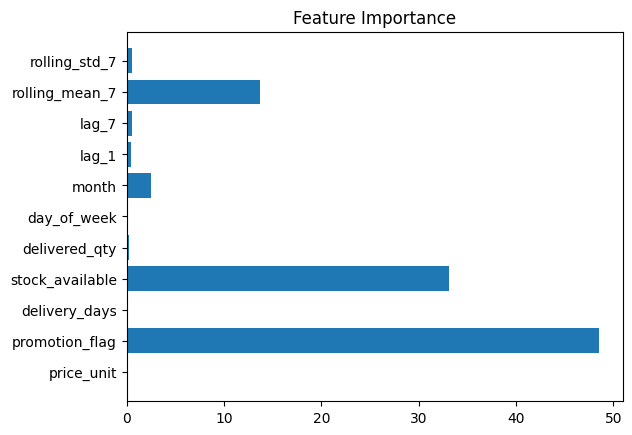

In [1]:
# ============================================
# 04 — ML MODEL (CATBOOST)
# ============================================

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load features
df = pd.read_csv("../data/processed/FMCG_features.csv")
df['date'] = pd.to_datetime(df['date'])

# --------------------------------------------
# Train/Test Split (Time-based)
# --------------------------------------------

split_date = df['date'].max() - pd.Timedelta(days=90)

train = df[df['date'] <= split_date]
test = df[df['date'] > split_date]

features = [
    'price_unit',
    'promotion_flag',
    'delivery_days',
    'stock_available',
    'delivered_qty',
    'day_of_week',
    'month',
    'lag_1',
    'lag_7',
    'rolling_mean_7',
    'rolling_std_7'
]

target = 'units_sold'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# --------------------------------------------
# Model
# --------------------------------------------

model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='RMSE',
    verbose=100
)

model.fit(X_train, y_train)

# --------------------------------------------
# Evaluation
# --------------------------------------------

pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("MAE:", mae)
print("RMSE:", rmse)

# --------------------------------------------
# Feature Importance
# --------------------------------------------

import matplotlib.pyplot as plt

importance = model.get_feature_importance()
plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()